### Cocktail/Drink Recommendation

I love cocktails, not only because of its fancy appearance, but also its some of mix tastes. I even attended a bartender course and got a certificate. While making cocktails at home, I always want to make different cocktails, but somehow similar to what I had made and also based on similar liquor. Therefore, there is this program.    
This program intends to find five most similar cocktails/drinks utilizing Gower’s dissimilarity measure. The data has been cleaned in previous programs.

In [11]:
# import package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import gower
from sklearn.preprocessing import scale,StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
# import prepared cocktail dataset - the ingredients have been grouped (e.g., different kind of sugar, syrup are combined into syrup)

df = pd.read_csv('/Users/ellenxiao/Documents/Udemy/cocktail/cocktail_clean1.0.csv')
df.head()

,DrinkName,rum,soda,grain alcohol,herb,anis,vodka,citrus,currant,spice,...,tequila,cookie,peach,chili,ice cream,rose,vinegar,tomato,water,yoghurt
0,A1,0.0,0.000000,0.0,0,0,0.0,1,0,0,...,0.0,0,0,0,0,0,0,0,0,0.0
1,ABC,0.0,0.000000,0.0,0,0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0.0
2,Ace,0.0,0.000000,0.0,0,0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0.0
3,Adam,2.0,0.000000,0.0,0,0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0.0
4,AT&T,0.0,3.546303,0.0,0,0,1.0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0.0


In [6]:
# check basic information of dataset

print('Number of Rows: ',df.shape[0])
print('Number of Columns: ', df.shape[1])
print('Features: \n', df.columns.tolist())
print('Number of null value: ', df.isnull().sum().values.sum())
print('Unique values: \n', df.nunique())

Number of Rows:  404
Number of Columns:  44
Features: 
 ['DrinkName', 'rum', 'soda', 'grain alcohol', 'herb', 'anis', 'vodka', 'citrus', 'currant', 'spice', 'brandy', 'syrup', 'agave', 'almond', 'bitters', 'campari', 'apple', 'whiskey', 'cream', 'cocoa', 'beer', 'berries', 'butter', 'salt', 'champagne', 'coke', 'milk', 'coconut', 'coffee', 'wine', 'tropical fruit', 'gin', 'grape', 'pomegranate', 'tequila', 'cookie', 'peach', 'chili', 'ice cream', 'rose', 'vinegar', 'tomato', 'water', 'yoghurt']
Number of null value:  0
Unique values: 
 DrinkName         404
rum                29
soda               16
grain alcohol      33
herb                2
anis                2
vodka              25
citrus              2
currant             2
spice               2
brandy             16
syrup              47
agave               2
almond              2
bitters             8
campari             5
apple               2
whiskey            21
cream               2
cocoa               2
beer              

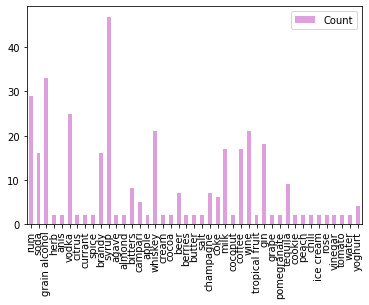

In [7]:
# Explore the ingredient distribution
df_count = pd.DataFrame(df.nunique(),columns=['Count']).drop('DrinkName')
df_count.plot(kind='bar',color='plum')

In [8]:
# separate numerical and categorical features

num_features = ['rum', 'grain alcohol', 'vodka', 'brandy', 'bitters',
       'campari', 'whiskey', 'beer', 'soda', 'syrup', 'champagne', 'coke', 'milk', 'coffee',
       'wine', 'gin', 'tequila', 'yoghurt']

cat_features = []
for col in df.columns:
    if col not in num_features:
        cat_features.append(col)

In [9]:
# scale standardization of numerical values
df_num = pd.DataFrame(StandardScaler().fit_transform(df[num_features]),columns=num_features)
df_cat = df.drop(columns=num_features)
df_std = df_cat.merge(df_num,left_index=True,right_index=True,how='left')
df_w_name = df_std
df_w_name.head()
df_std = df.set_index('DrinkName')

In [12]:
# generate similarity matrix
distance_matrix = gower.gower_matrix(df_std)
#create complete linkage
Zd = linkage(distance_matrix,method='complete') 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


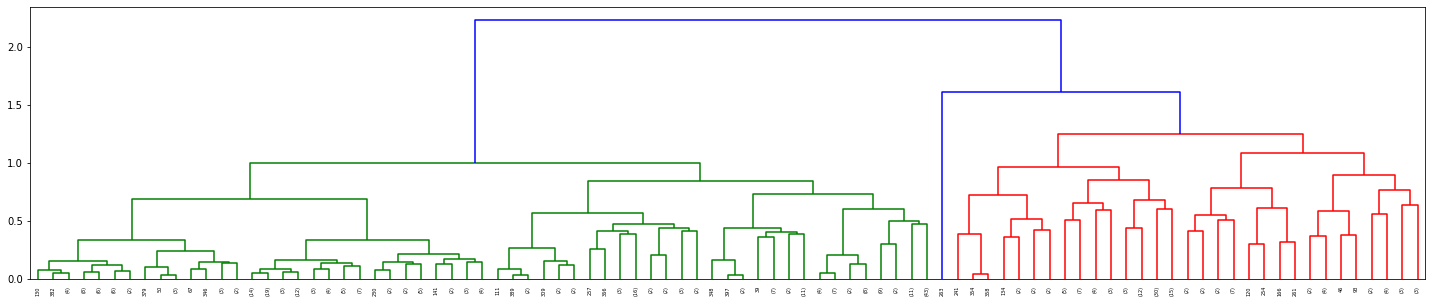

In [13]:
# hierarchical clustering visulization
fig,axs = plt.subplots(1,1,figsize=(25,5))
dn = dendrogram(Zd, truncate_mode='level',p=6,show_leaf_counts=True,ax=axs)

In [14]:
# find similar cocktails
def find_similar(row,k):
    n_similar = gower.gower_topn(df_std.iloc[row:row+1,:],df_std,n=k)
    similar_cocktails = []
    distance = list(n_similar['values'])
    for i in n_similar['index']:
        similar_cocktails.append(df_w_name.iloc[i,0])
    similar_cocktails = similar_cocktails[1:]
    return similar_cocktails

df_similar = pd.DataFrame()
for i,row in df_w_name.iterrows():
    df_similar[row['DrinkName']] = find_similar(i,6)
df_similar_t = df_similar.T
df_similar_t.columns = ['top 1','top 2','top 3','top 4','top 5']

In [16]:
# user input the target cocktail
find_similar_cocktail = input("What cocktails/drinks is similar to ...? Just enter a cocktail/drink name: ")

What cocktails/drinks is similar to ...? Just enter a cocktail/drink name: Gin Fizz


In [17]:
print(df_similar_t.loc[find_similar_cocktail])

top 1    Royal Gin Fizz
top 2        Gin Cooler
top 3          Aviation
top 4         Dragonfly
top 5            Gimlet
Name: Gin Fizz, dtype: object
